# Analisis de caracteristicas de los diferentes procesadores de diferentes marcas
El procesador de un computador es una de las partes mas importantes al momento de elegir una pc, Laptop o celular. A lo largo del tiempo las diferentes marcas han puesto toda su dedicación a crear procesadores que se adapten a la necesidad de cada usuario. Esa gran meta sumado a la gran competencia que hay hoy en dia entre las diferentes marcas ha hecho todo lo contrario, confundir al usuario con procesadores "parecidos" que a la hora de la verdad no encuentran mucha diferencia para el usuario corriente. Por eso en este analisis veremos sus caracteristicas mas comunes y para que sirve cada uno de ellos dependiendo de su rendimiento.

Importamos el .csv con estas caracteristicas


In [65]:
import pandas as pd
import numpy as np
import matplotlib as mp

my_data = pd.read_csv("CPU_r23_v2.csv")
my_data

,manufacturer,cpuName,singleScore,multiScore,cores,threads,baseClock,turboClock,type
0,AMD,Threadripper 3990X,1262,75671,64,128,2.9,4.50,Desktop
1,AMD,Threadripper Pro 3995WX,1231,73220,64,128,2.7,4.20,Desktop
2,AMD,Epyc 7702P,993,48959,64,128,2.0,3.35,Desktop
3,AMD,Threadripper 3970X,1308,46874,32,64,3.7,4.50,Desktop
4,AMD,Threadripper Pro 3975WX,1244,43450,32,64,3.5,4.20,Desktop
...,...,...,...,...,...,...,...,...,...
210,AMD,Ryzen 3 4300GE,1215,5798,4,8,3.5,4.00,Desktop
211,Intel,Core i7 1185G7,1473,5783,4,8,1.2,4.80,Laptop
212,Intel,Core i7 11370H,1535,5778,4,8,3.0,4.80,Laptop
213,Intel,Core i3 10105F,1172,5776,4,8,3.7,4.40,Desktop



En todos los casos donde se exporte un archivo .csv, y mas cuando no sabemos de su procedencia, es necesario verificar si tiene caracteres nulos o los famosos NaN, que dentro del achivo .csv se verán como dos comas de seguido (1435,,132) y que al momento de exportarlos a python se les reconoce como nulos, esto nos trae problemas al momento de ejecutar operaciones y graficas.

In [66]:
my_data.isna().sum() #Verificación de caracteres perdidos por columnas

manufacturer    0
cpuName         0
singleScore     0
multiScore      0
cores           0
threads         0
baseClock       0
turboClock      0
type            0
dtype: int64

Verificamos Cuantos procesadores hay por marcas...

In [68]:
marks = my_data["manufacturer"].value_counts()
marks

Intel    125
AMD       86
Apple      4
Name: manufacturer, dtype: int64

Y verificamos tambien la funcionalidad de cada uno...

In [69]:
types = my_data["type"].value_counts()
types

Desktop    144
Laptop      71
Name: type, dtype: int64

Empezaremos analizando por marcas, comenzando por AMD

In [70]:
data_sor = my_data.sort_values("manufacturer")
amd = data_sor[data_sor["manufacturer"] == "AMD"]
amd

,manufacturer,cpuName,singleScore,multiScore,cores,threads,baseClock,turboClock,type
0,AMD,Threadripper 3990X,1262,75671,64,128,2.9,4.50,Desktop
125,AMD,Ryzen 5 3600XT,1330,9945,6,12,3.8,4.20,Desktop
122,AMD,Ryzen 7 Pro 4750GE,1288,10105,8,16,3.6,4.40,Desktop
120,AMD,Ryzen 5 5600H,1383,10136,6,12,3.3,4.20,Laptop
119,AMD,Ryzen 7 2700X,1102,10140,8,16,3.7,4.30,Desktop
...,...,...,...,...,...,...,...,...,...
55,AMD,Ryzen 7 5800,1580,14231,8,16,3.4,4.60,Desktop
21,AMD,Threadripper 2950X,1135,18797,16,32,3.5,4.40,Desktop
22,AMD,Ryzen 9 3900X,1312,18682,12,24,3.8,4.60,Desktop
2,AMD,Epyc 7702P,993,48959,64,128,2.0,3.35,Desktop


In [71]:
uninucleo = amd[["cpuName", "singleScore"]]
uninucleo

,cpuName,singleScore
0,Threadripper 3990X,1262
125,Ryzen 5 3600XT,1330
122,Ryzen 7 Pro 4750GE,1288
120,Ryzen 5 5600H,1383
119,Ryzen 7 2700X,1102
...,...,...
55,Ryzen 7 5800,1580
21,Threadripper 2950X,1135
22,Ryzen 9 3900X,1312
2,Epyc 7702P,993


<AxesSubplot:xlabel='cpuName'>

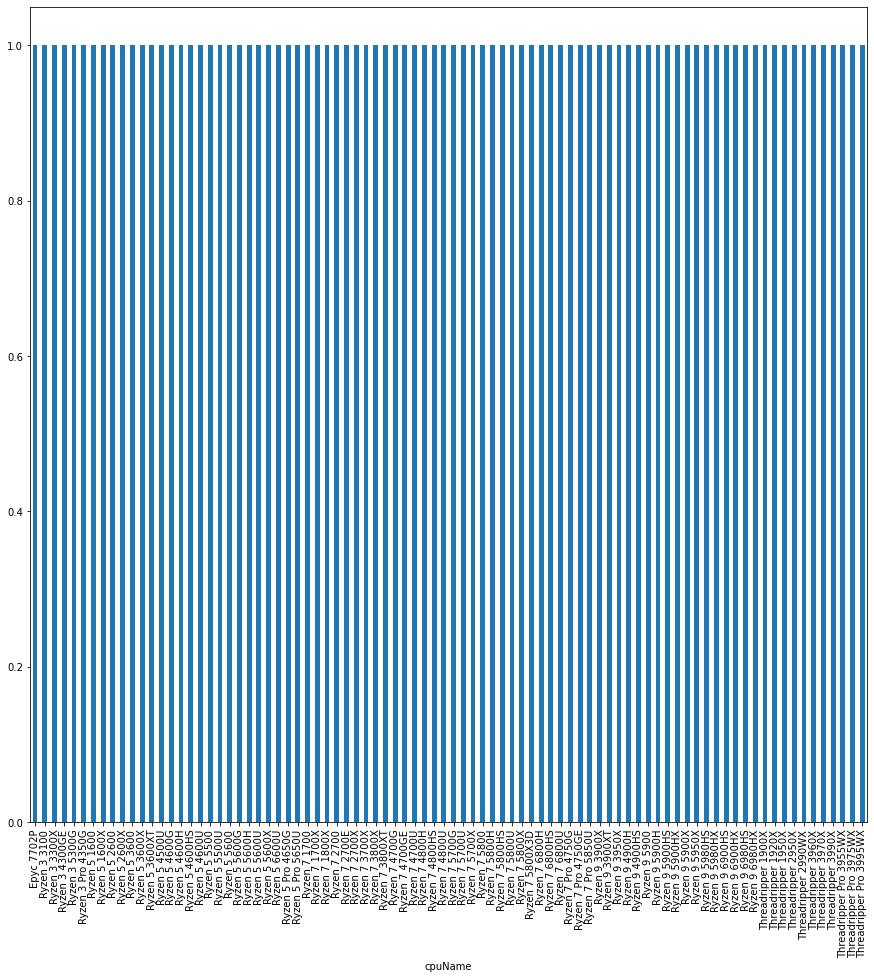

In [76]:
uninucleo.groupby("cpuName")["singleScore"].count().plot(kind="bar", figsize=(15,15))